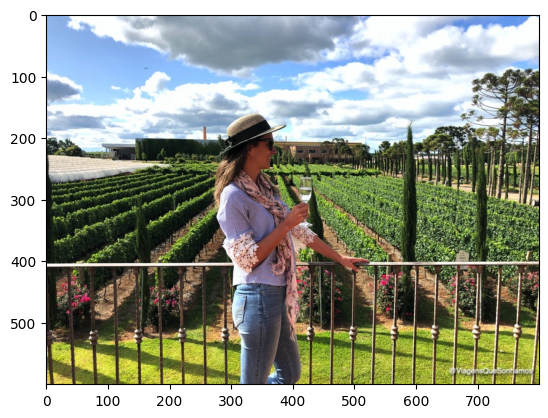

In [1]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('vinho.jpg'))

## Faz a limpeza e tratamento dos dados de vinho tinto

- Arquivo de características de vinho tinto
https://www.kaggle.com/code/renanneves/wine-quality-uma-intro-ao-dataset/output

Este conjunto de dados está relacionado com variantes tintas do vinho verde português. Para mais detalhes, consulte a referência [Cortez et al., 2009]. Devido a questões de privacidade e logística, apenas variáveis ​​físico-químicas (entradas) e sensoriais (saída) estão disponíveis (por exemplo, não há dados sobre tipos de uva, marca de vinho, preço de venda do vinho, etc.).

Os conjuntos de dados podem ser vistos como tarefas de classificação ou regressão. As classes são ordenadas e não balanceadas (por exemplo, há muito mais vinhos normais do que excelentes ou ruins).

Este conjunto de dados também está disponível no repositório de aprendizado de máquina da UCI, https://archive.ics.uci.edu/ml/datasets/wine+quality

In [11]:
# importa bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None) # permite exibição de todas as linhas
pd.set_option('display.max_columns', None) # permite exibição de todas as colunas
import warnings
warnings.simplefilter('ignore') # inibe avisos de warning

In [12]:
# le os dados do dataset recebendo em formato de dataframe
dfx = pd.read_csv('arquivos/HousePriceIndia.csv', decimal=',')

In [13]:
# verifica quantas linhas e colunas o dataframe possui
dfx.shape

(14619, 23)

In [14]:
# reconhece os nomes das colunas existentes e verifica se existe algum nulo.
# existem várias linhas com nulos que serão apagadas
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     14619 non-null  int64 
 1   Date                                   14619 non-null  int64 
 2   number of bedrooms                     14619 non-null  int64 
 3   number of bathrooms                    14619 non-null  object
 4   living area                            14619 non-null  int64 
 5   lot area                               14619 non-null  int64 
 6   number of floors                       14619 non-null  object
 7   waterfront present                     14619 non-null  int64 
 8   number of views                        14619 non-null  int64 
 9   condition of the house                 14619 non-null  int64 
 10  grade of the house                     14619 non-null  int64 
 11  Area of the hou

In [15]:
# Faz um reconhecimento das colunas e dos dados
dfx.head(5)

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.5,2920,4000,1.5,0,0,5,8,1910,1010,1909,0,122004,52.8878,-114.47,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.5,3310,42998,2,0,0,3,9,3310,0,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2,2710,4500,1.5,0,0,4,8,1880,830,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.5,2600,4750,1,0,0,4,9,1700,900,1951,0,122007,52.9133,-114.59,2380,4750,1,67,790000


In [16]:
# altera o tipo da coluna number of bathrooms para float
dfx['number of bathrooms'] = dfx['number of bathrooms'].astype(float)

In [17]:
# renomeando as colunas
dfx.columns = ['id', 'Date', 'nro_quartos', 'nro_banheiros',
       'area_lazer', 'area_lote', 'nro_pisos', 'dist_beira_mar',
       'nro_visualizações', 'indica_conservação', 'nota_avaliação',
       'area_casa', 'area_porão', 'ano_construção', 'ano_reforma', 
       'cod_postal', 'lat', 'long', 'ajuste_area_lazer', 'ajuste_area_lote',
       'nro_escolas_prox', 'distância_aeroporto', 'preço']

In [20]:
from ydata_profiling import ProfileReport

profile = ProfileReport(dfx)

profile.to_file("arquivos_tratados/HousePriceIndia.html")

ModuleNotFoundError: No module named 'ydata_profiling'

In [ ]:
search_outliers = ['nro_quartos', 'nro_banheiros', 'area_lazer', 'area_lote', 'nro_pisos']
search_outliers = ['dist_beira_mar', 'nro_visualizações', 'indica_conservação', 'nota_avaliação', 'area_casa']
search_outliers = ['area_porão', 'ajuste_area_lazer', 'ajuste_area_lote',]
search_outliers = ['nro_escolas_prox', 'distância_aeroporto', 'preço']

In [ ]:
# verifica algumas estatísticas de posição e dispersão
dfx.describe().round(2)

,id,Date,nro_quartos,nro_banheiros,area_lazer,area_lote,dist_beira_mar,nro_visualizações,indica_conservação,nota_avaliação,area_casa,area_porão,ano_construção,ano_reforma,cod_postal,ajuste_area_lazer,ajuste_area_lote,nro_escolas_prox,distância_aeroporto,preço
count,1.461900e+04,14619.00,14619.00,14619.00,14619.00,14619.00,14619.00,14619.00,14619.00,14619.00,14619.00,14619.00,14619.00,14619.00,14619.00,14619.00,14619.00,14619.00,14619.00,14619.00
mean,6.762821e+09,42604.55,3.38,2.13,2098.16,15093.69,0.01,0.23,3.43,7.68,1801.68,296.48,1970.93,90.93,122033.06,1996.64,12754.00,2.01,64.95,538806.28
std,6.237160e+03,67.34,0.94,0.77,928.22,37920.89,0.09,0.77,0.66,1.17,833.74,448.57,29.49,416.23,19.08,691.08,26059.23,0.82,8.94,367229.36
min,6.762810e+09,42491.00,1.00,0.50,370.00,520.00,0.00,0.00,1.00,4.00,370.00,0.00,1900.00,0.00,122003.00,460.00,651.00,1.00,50.00,78000.00
25%,6.762815e+09,42546.00,3.00,1.75,1440.00,5010.50,0.00,0.00,3.00,7.00,1200.00,0.00,1951.00,0.00,122017.00,1490.00,5097.50,1.00,57.00,320000.00
50%,6.762821e+09,42600.00,3.00,2.25,1930.00,7620.00,0.00,0.00,3.00,7.00,1580.00,0.00,1975.00,0.00,122032.00,1850.00,7620.00,2.00,65.00,450000.00
75%,6.762826e+09,42662.00,4.00,2.50,2570.00,10800.00,0.00,0.00,4.00,8.00,2240.00,580.00,1997.00,0.00,122048.00,2380.00,10125.00,3.00,73.00,645000.00
max,6.762832e+09,42734.00,33.00,8.00,13540.00,1074218.00,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,122072.00,6110.00,560617.00,3.00,80.00,7700000.00


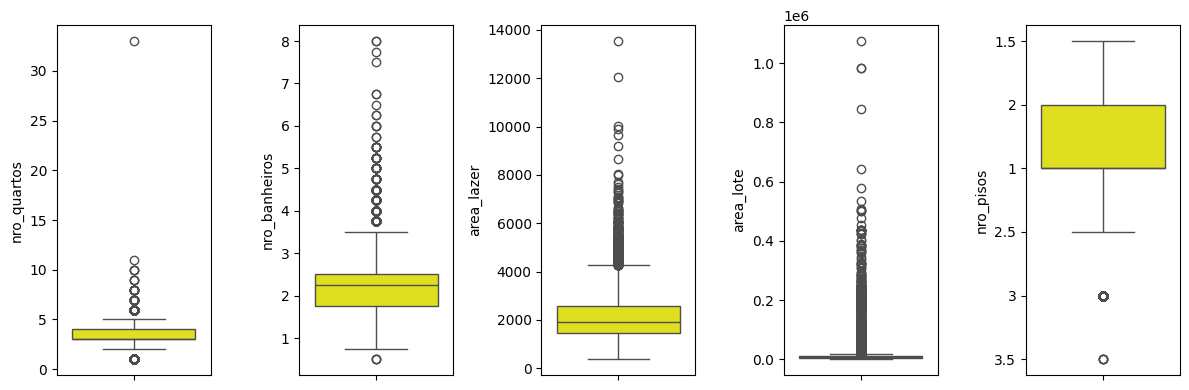

In [ ]:
# visualizando boxplot para ver a distribuição nos quartis e a existência de outliers
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(12, 4), tight_layout=True)

search_outliers = ['nro_quartos', 'nro_banheiros', 'area_lazer', 'area_lote', 'nro_pisos']

for i, column in enumerate(search_outliers):
    sns.boxplot(y=column, data=dfx, ax=axs[i], color='yellow')
plt.show()

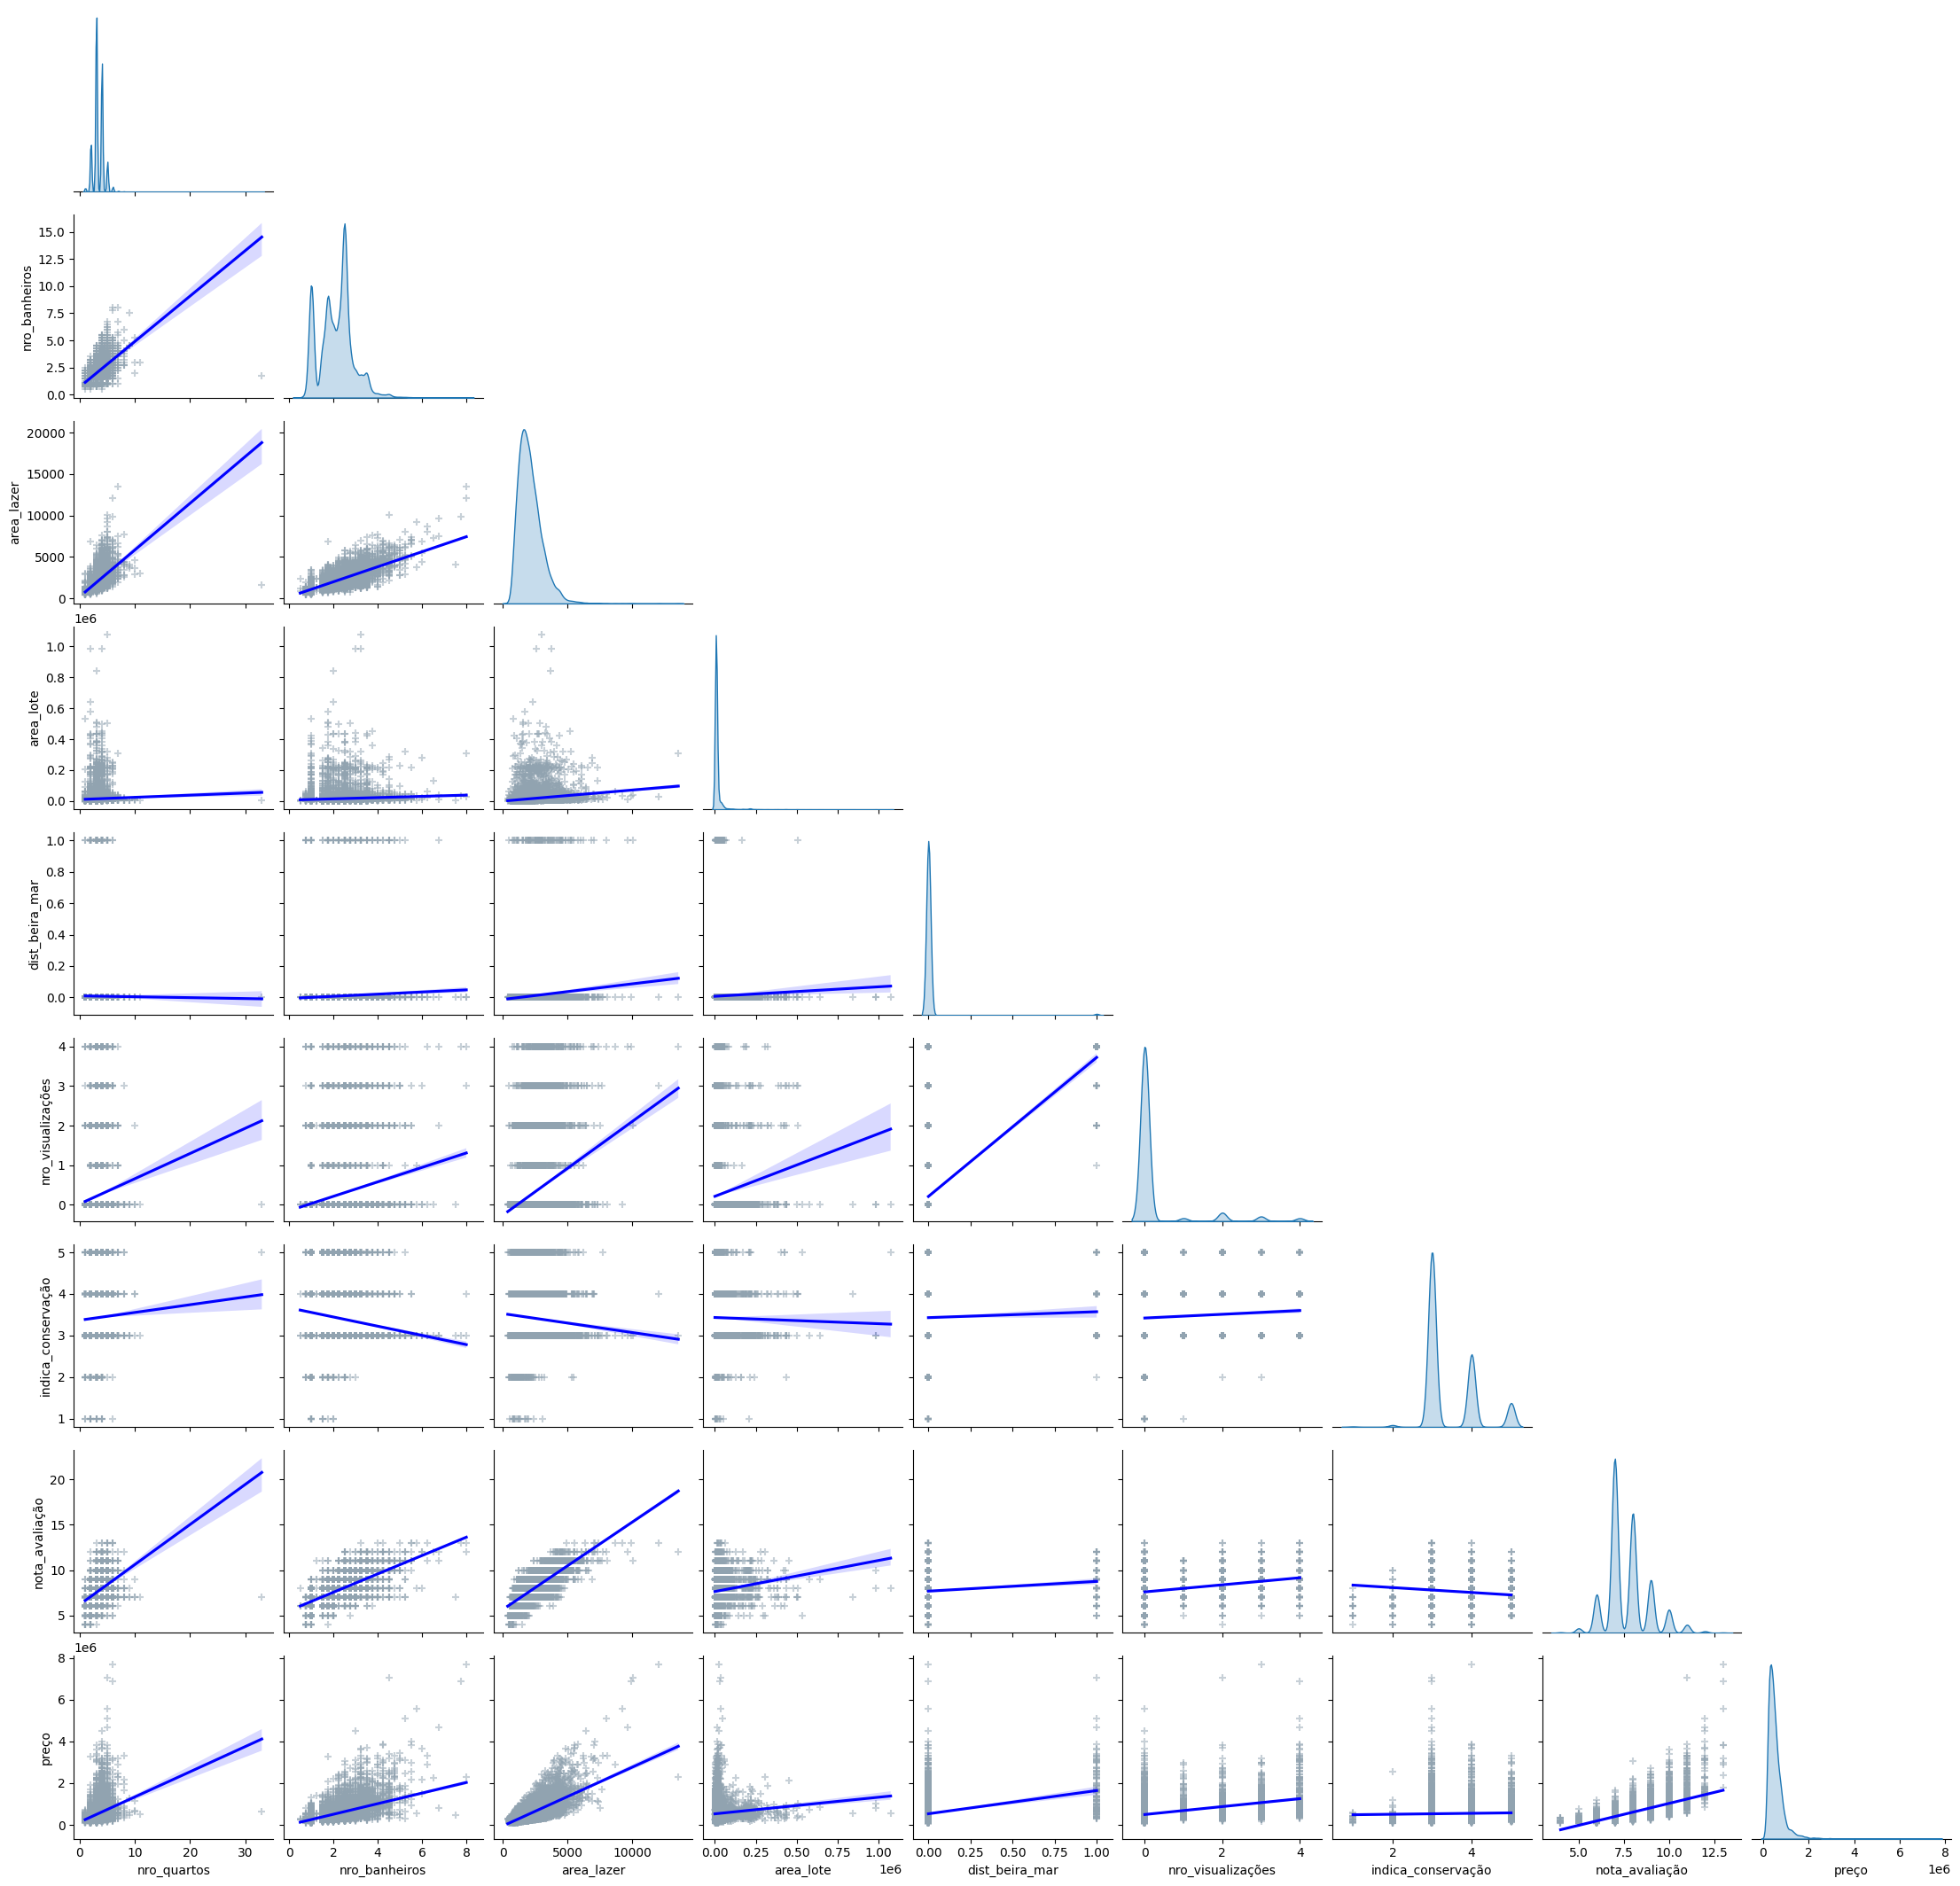

In [ ]:
# verificando a distribuição dos dados
p= sns.pairplot(dfx[['nro_quartos', 'nro_banheiros', 'area_lazer', 'area_lote', 'nro_pisos', 
                     'dist_beira_mar', 'nro_visualizações', 'indica_conservação', 'nota_avaliação',
                     'preço']],
                diag_kind="kde", corner=True, markers="+",
                plot_kws={'line_kws':{'color':'#0000ff'}, 
                           'scatter_kws': {'alpha': 0.5, 
                                           'color': '#91a3b0'}},
                kind='reg'
                );
p.fig.subplots_adjust(top=0.95)

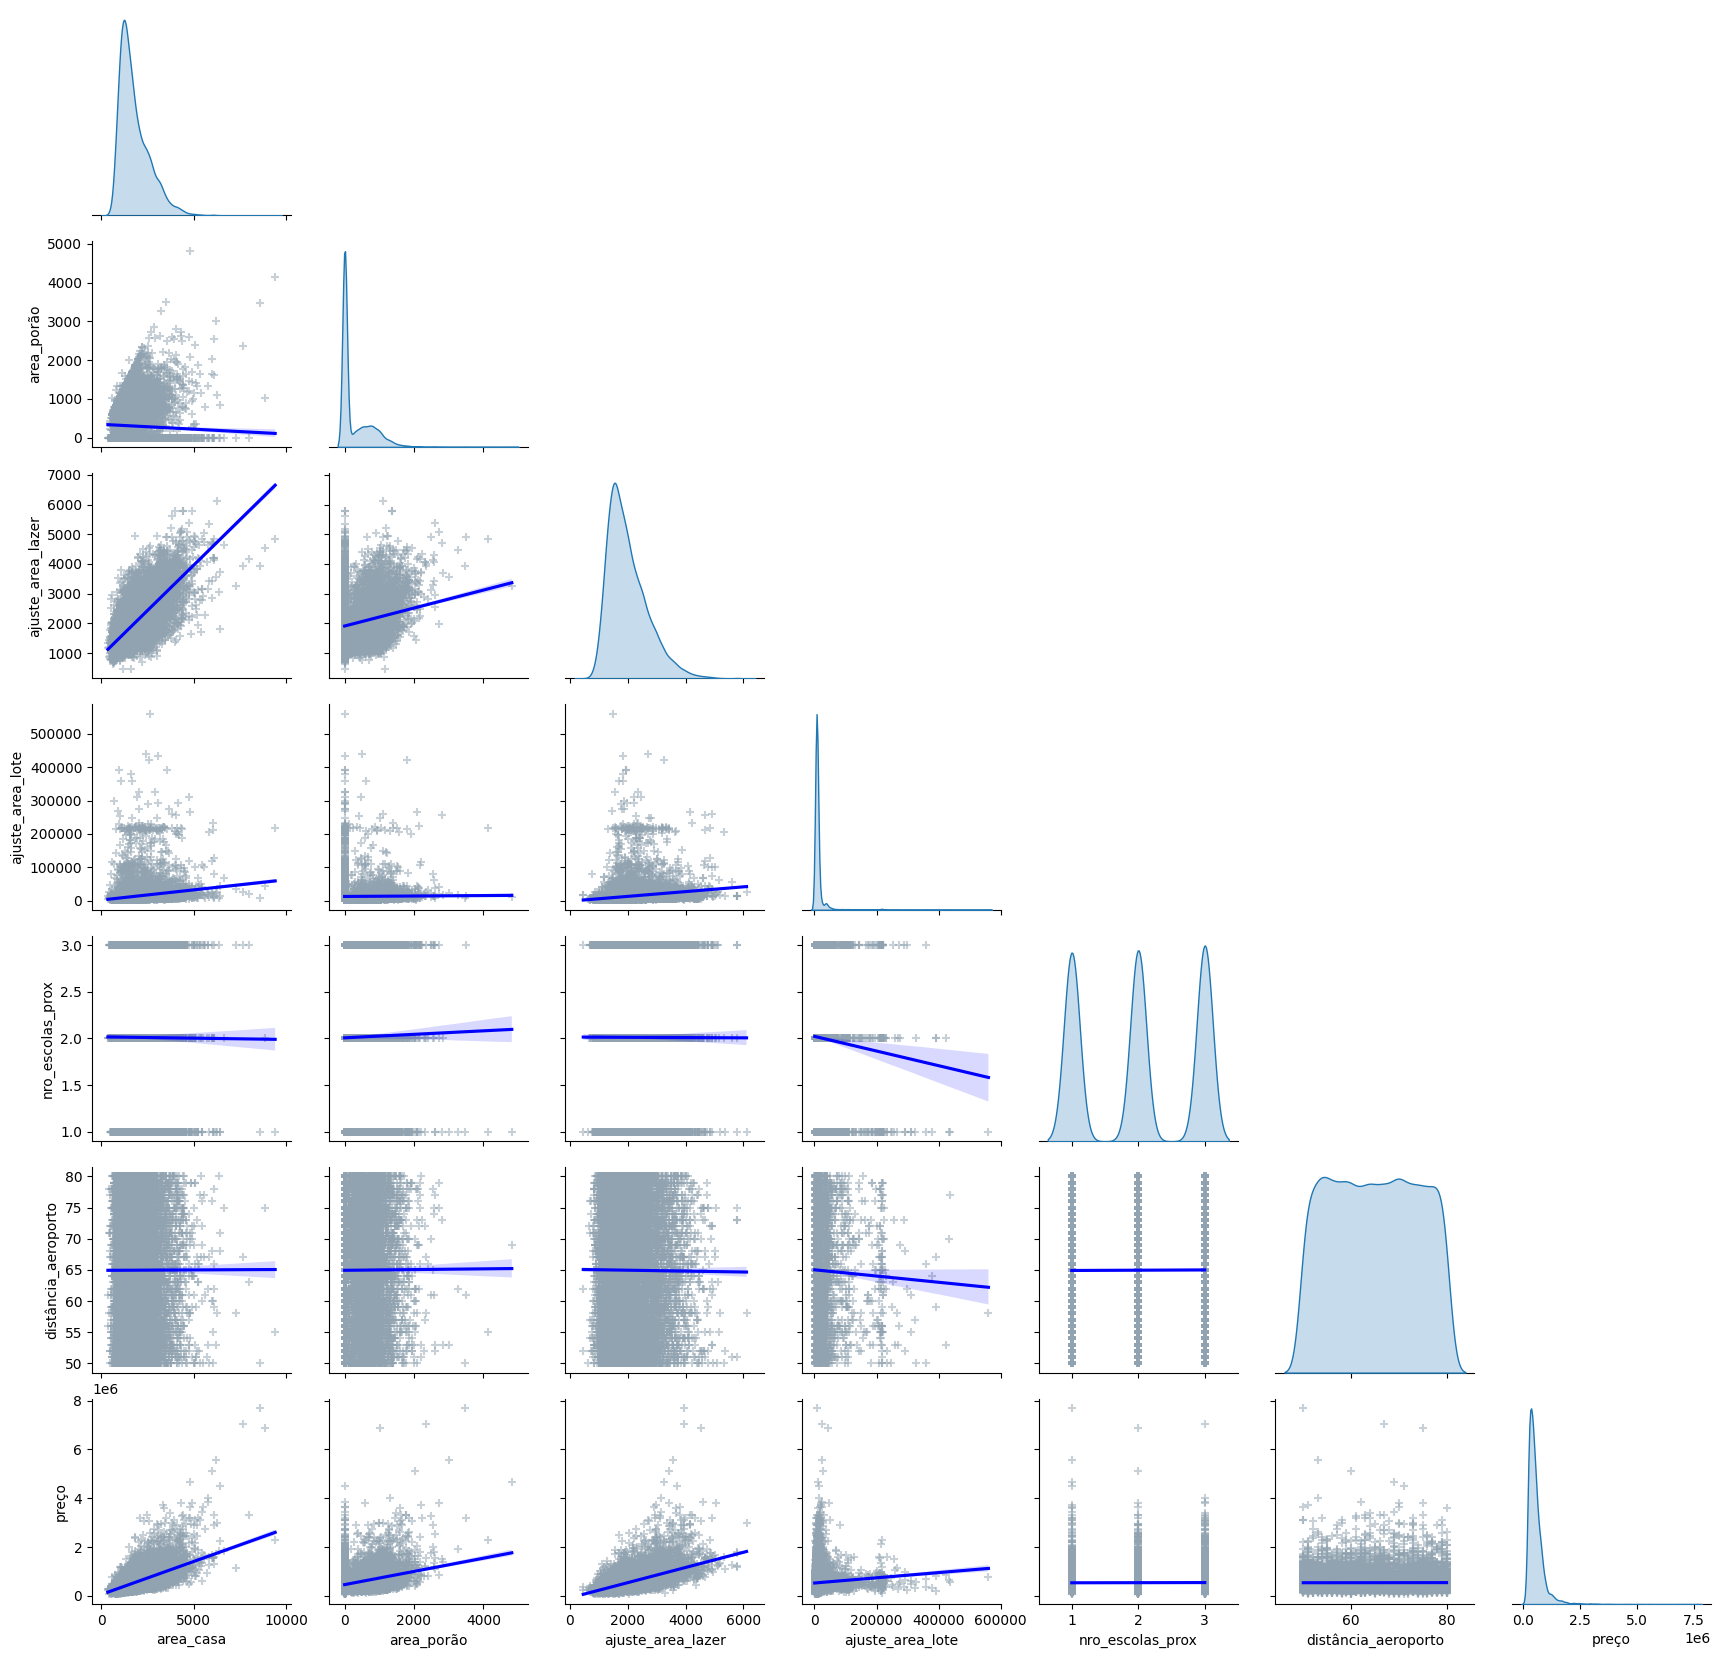

In [ ]:
# verificando a distribuição dos dados
p= sns.pairplot(dfx[['area_casa', 'area_porão', 'ajuste_area_lazer', 'ajuste_area_lote',
                     'nro_escolas_prox', 'distância_aeroporto',
                     'preço']],
                diag_kind="kde", corner=True, markers="+",
                plot_kws={'line_kws':{'color':'#0000ff'}, 
                           'scatter_kws': {'alpha': 0.5, 
                                           'color': '#91a3b0'}},
                kind='reg'
                );
p.fig.subplots_adjust(top=0.95)

Na última linha (cons_litros) do gráfico anterior pode-se observar que temos uma relação linear significativa entre o consumo de cerveja com a temp_media (temperatura média), temp_max(temperatura máxima) e que o consumo aumenta quando se aproxima o final de semana.

<Axes: >

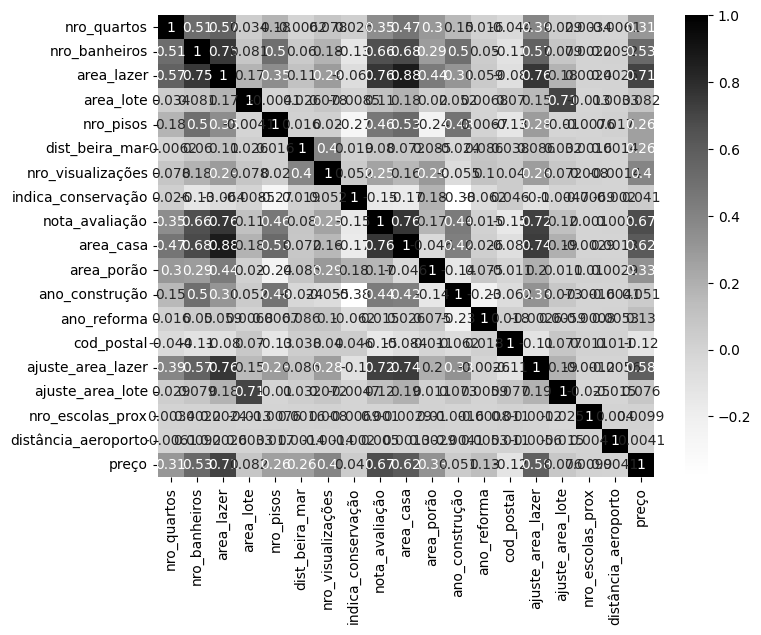

In [ ]:
# correlação entre os valores
fig,ax = plt.subplots(figsize=(8,6))

sns.heatmap(dfx[['nro_quartos', 'nro_banheiros', 'area_lazer', 'area_lote', 'nro_pisos', 
                     'dist_beira_mar', 'nro_visualizações', 'indica_conservação', 'nota_avaliação',
                     'area_casa', 'area_porão', 'ano_construção', 'ano_reforma',
                     'cod_postal', 'ajuste_area_lazer', 'ajuste_area_lote',
                     'nro_escolas_prox', 'distância_aeroporto',
                     'preço']].\
            corr().round(4), annot=True, cmap="Grays")

Na últma coluna (cons_liros) do gráfico anterior, observamos que temos uma correlação maior que 0,50 do consumo de cerveja com a temp_media (temperatura média), temp_max(temperatura máxima) e com a informação de fim de semana. Vamos adotar essas 3 informações que se alinham ao consumo de cerveja.

In [ ]:
# salva os dados tratados em arquivo csv organizado por data
dfx.sort_values(by=["Date"]).to_csv('arquivos_tratados/df_HousePriceIndia.csv', index=False)